## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.


In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [355]:
#importing the dataset

data = pd.read_csv("Playstore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [356]:
data.shape #shape

(10841, 13)

In [357]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### *Since all the columns are in object except Ratings, our task is to covert all the numeric column into int/float type for our model*

In [358]:
df = data.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [359]:
#  Reviews lets start with reviews
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [360]:
df.Reviews.value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: count, Length: 6002, dtype: int64

In [361]:
df['Reviews'].str.isnumeric().sum()   # checking the numeric values

10840

In [362]:
df[~df['Reviews'].str.isnumeric()]   # it perint the non-numeric values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [363]:
df.drop(df.index[10472], inplace = True)  #droping the columns

In [364]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [365]:
df.Reviews = df.Reviews.astype(int)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [367]:
# now handling Size

df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [368]:
df['Size'] = df['Size'].str.replace('M','000')  #converting M into million

In [369]:
df['Size'] = df['Size'].str.replace('k','')     #Converting K into thousands

In [370]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)  # handling a string 

In [371]:
df['Size'] = df['Size'].astype(float)   #finally converting into float

In [372]:
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [373]:
df.Size[~df['Size'].notna()]

37      NaN
42      NaN
52      NaN
67      NaN
68      NaN
         ..
10713   NaN
10725   NaN
10765   NaN
10826   NaN
10839   NaN
Name: Size, Length: 1695, dtype: float64

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [375]:
df.Installs.unique()  # checking unique values 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [376]:
# now we want to remove '+', ','
items = ['+',',']

for item in items :
    df['Installs'] = df['Installs'].str.replace(item,'')

In [377]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [378]:
df['Installs']= df['Installs'].astype(int)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.1+ MB


In [380]:
# Now handling type

df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [381]:
# Cleaning types columns

df = df.dropna(subset = ['Type'])

In [382]:
df['Type'].isna().sum()

0

## Using OneHotEncoding 
Spliting Type into two subcategory

In [383]:
# Using One Hot Encoding for this categorical data

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded = encoder.fit_transform(df[['Type']]).toarray()
encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [384]:
df.drop('Type', inplace = True, axis = 1)

In [385]:
encoded_Df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(['Type']))

In [386]:
df = pd.concat([df,encoded_Df], axis = 1)

In [387]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.0,0.0


## Now Handle Price

In [388]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04', nan], dtype=object)

In [389]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype('float')
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04,    nan])

In [390]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.0,0.0


In [391]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [392]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

## Observation
1. content Rating is a categorical column and categories are mentioned above.
2. Can convert this column into min_age.

In [393]:
df['min_age'] = df['Content Rating'].map({'Everyone':1, 'Teen':13, 'Mature 17+':18, 'Everyone 10+' : 11, 'Adults only 18+' : 19,
                                              'Unrated':1})
df['min_age'].unique()

array([ 1., 13., 11., 18., 19., nan])

In [394]:
df.drop('Content Rating', inplace=True, axis = 1)

In [395]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,min_age
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0,0.0,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.0,0.0,1.0


## Now Converting Last Updated into Datetime formart

In [396]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'February 16, 2014', 'March 23, 2014', nan], dtype=object)

In [397]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])  #converted into datetime

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10472
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   App           10839 non-null  object        
 1   Category      10839 non-null  object        
 2   Rating        9366 non-null   float64       
 3   Reviews       10839 non-null  float64       
 4   Size          9145 non-null   float64       
 5   Installs      10839 non-null  float64       
 6   Price         10839 non-null  float64       
 7   Genres        10839 non-null  object        
 8   Last Updated  10839 non-null  datetime64[ns]
 9   Current Ver   10831 non-null  object        
 10  Android Ver   10837 non-null  object        
 11  Type_Free     10839 non-null  float64       
 12  Type_Paid     10839 non-null  float64       
 13  min_age       10839 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 1.2+ MB


In [399]:
categorical_col = [features for features in df.columns if df[features].dtype == 'O'] 
numerical_col = [features for features in df.columns if df[features].dtype != 'O'] 

print("We have {} numerical features : {}".format(len(numerical_col), numerical_col))
print("We have {} categorical features : {}".format(len(categorical_col), categorical_col))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Type_Free', 'Type_Paid', 'min_age']
We have 5 categorical features : ['App', 'Category', 'Genres', 'Current Ver', 'Android Ver']


## Now handle missing values in numerical Dataset
will apply mean,mode,median imputation techniques according to the data points

# 1. Rating

In [400]:
df['Rating'].isna().sum()

1475

<Axes: xlabel='Rating', ylabel='Count'>

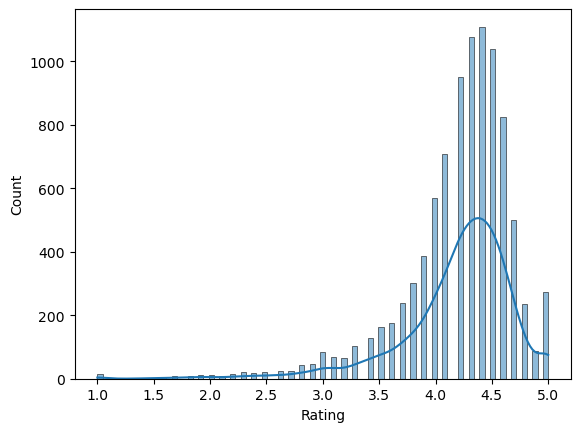

In [401]:
sns.histplot(df['Rating'], kde = True)

# Observation
### the given graph is Left-Scewed which implies most of its values are higher as compare to other values
### so for this kind of column we use Median imputation

In [402]:
## Applying median imputation
df['Rating'].median()

4.3

In [403]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [404]:
df.Rating.isna().sum()

0

# 2. Reviews

In [405]:
df['Reviews'].isna().sum()

2

In [406]:
df.dropna(subset = 'Reviews', inplace = True)

# 3. Size

In [407]:
df['Size'].isna().sum()

1694

<Axes: xlabel='Size', ylabel='Count'>

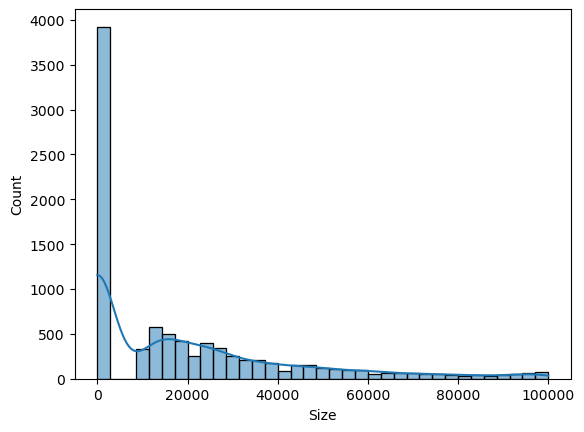

In [408]:
sns.histplot(df['Size'], kde = True)

<Axes: ylabel='Size'>

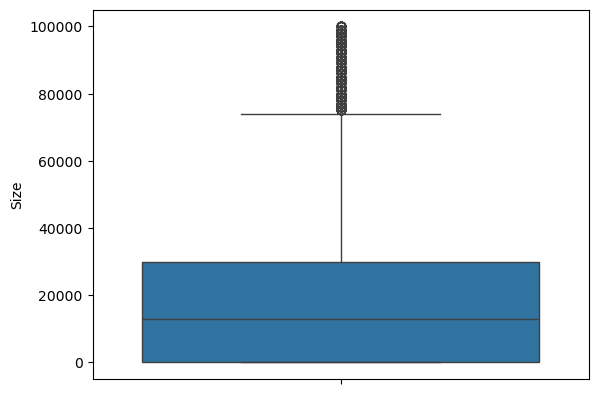

In [409]:
sns.boxplot(df['Size'])

# Observation
1. The dataset is right scewed
2. The outliers are present in the column
3. We need to handle the outliers as well before doing the imputation

## the main problem is size of the app can vary according to the category like gaming app have bigger size as compared to family 
## So what I think what we gonna do we classify size column according to the category

In [410]:
# checking for numbers of outliers present

Q1 = df['Size'].quantile(0.25)
Q3 = df['Size'].quantile(0.75)

# now checking interquantile range (IQR)

IQR = Q3-Q1
IQR

29994.4

In [411]:
Lower_fence = Q1 - (1.5)*IQR
Upper_fence = Q3 + (1.5)*IQR

print('Lower fence : {}'.format(Lower_fence))
print('Upper fence : {}'.format(Upper_fence))


Lower fence : -44986.00000000001
Upper fence : 74991.6


In [412]:
# Method : 1

count = 0
for i in df['Size']:
    if (i <= Lower_fence) | (i >= Upper_fence):
        count = count+1
print("Number of Outliers :",count)

Number of Outliers : 428


In [413]:
# Method : 2

num_outliers = df[(df['Size'] < Lower_fence) | (df['Size'] > Upper_fence)].shape[0]
print(f"Number of outliers in Size_KB: {num_outliers}")

Number of outliers in Size_KB: 428


In [414]:
df['Size'] = df.groupby(['Category'])['Size'].transform(lambda x: x.fillna(x.median()))
df['Size'].isna().sum()

0

In [415]:
df['Size'] = df['Size'].clip(lower=Lower_fence, upper=Upper_fence)   # Capping the outliers

<Axes: xlabel='Size', ylabel='Count'>

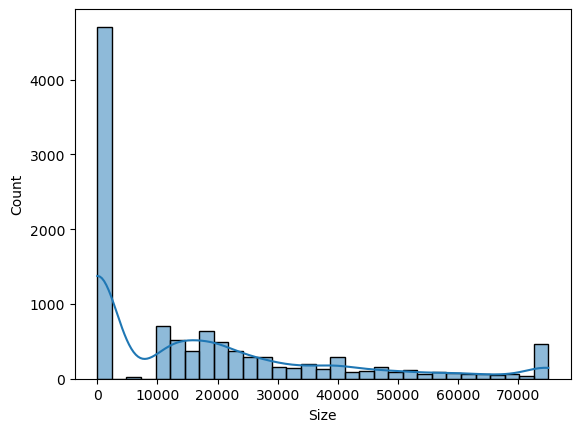

In [416]:
sns.histplot(df['Size'], kde = True)

## 4. Installs

In [417]:
df['Installs'].isna().sum()

0

## 5. Price

In [418]:
df['Price'].isnull().sum()

0

## 6. Last Updated

In [419]:
df['Last Updated'].isnull().sum()

0

In [420]:
df.isnull().sum()

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        0
Price           0
Genres          0
Last Updated    0
Current Ver     8
Android Ver     2
Type_Free       2
Type_Paid       2
min_age         0
dtype: int64

# Cleaning current Version and android Version

In [421]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1458
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

In [422]:
df[~df['Current Ver'].notna()]

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,min_age
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.7,5000.0,0.00,Art & Design,2018-06-06,NaN,4.2 and up,1.0,0.0,1.0
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,11.0,1000000.0,0.00,Libraries & Demo,2013-02-12,NaN,1.5 and up,1.0,0.0,1.0
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.7,500000.0,0.00,Tools,2017-05-10,NaN,4.0 and up,1.0,0.0,1.0
6803,BT Master,FAMILY,4.3,0.0,222.0,100.0,0.00,Education,2016-11-06,NaN,1.6 and up,1.0,0.0,1.0
7333,Dots puzzle,FAMILY,4.0,179.0,14000.0,50000.0,0.99,Puzzle,2018-04-18,NaN,4.0 and up,0.0,1.0,1.0
7407,Calculate My IQ,FAMILY,4.3,44.0,7.2,10000.0,0.00,Entertainment,2017-04-03,NaN,2.3 and up,1.0,0.0,1.0
7730,UFO-CQ,TOOLS,4.3,1.0,237.0,10.0,0.99,Tools,2016-07-04,NaN,2.0 and up,0.0,1.0,1.0
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8.0,658.0,1000.0,0.00,Books & Reference,2017-01-31,NaN,3.0 and up,1.0,0.0,1.0


In [423]:
df['Current Ver']= df['Current Ver'].fillna(df['Current Ver'].mode()[0])
df.isnull().sum()

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        0
Price           0
Genres          0
Last Updated    0
Current Ver     0
Android Ver     2
Type_Free       2
Type_Paid       2
min_age         0
dtype: int64

In [424]:
df[~df['Android Ver'].notna()]

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,min_age
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11000.0,1000.0,1.49,Personalization,2018-07-20,4.4,NaN,0.0,1.0,1.0
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1,10000.0,0.00,Personalization,2018-03-27,1.1,NaN,1.0,0.0,1.0


In [425]:
df['Android Ver']= df['Android Ver'].fillna(df['Android Ver'].mode()[0])
df.isnull().sum()

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        0
Price           0
Genres          0
Last Updated    0
Current Ver     0
Android Ver     0
Type_Free       2
Type_Paid       2
min_age         0
dtype: int64

In [426]:
df[~df['Type_Free'].notna()]

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,min_age
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,8.5,1000.0,0.0,Books & Reference,2015-01-19,Varies with device,Varies with device,NaN,NaN,18.0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19000.0,10000000.0,0.0,Lifestyle,2018-07-25,Varies with device,Varies with device,NaN,NaN,1.0


In [427]:
df['Type_Free']= df['Type_Free'].fillna(df['Type_Free'].mode()[0])
df.isnull().sum()

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        0
Price           0
Genres          0
Last Updated    0
Current Ver     0
Android Ver     0
Type_Free       0
Type_Paid       2
min_age         0
dtype: int64

In [428]:
df['Type_Paid']= df['Type_Paid'].fillna(df['Type_Paid'].mode()[0])
df.isnull().sum()

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        0
Price           0
Genres          0
Last Updated    0
Current Ver     0
Android Ver     0
Type_Free       0
Type_Paid       0
min_age         0
dtype: int64

In [429]:
df[df.duplicated('App')].shape

(1181, 14)

In [430]:
df.drop_duplicates(subset = 'App', keep = 'first', inplace = True)

In [431]:
df[df.duplicated('App')].shape

(0, 14)